# Initial Exploratory Data Analysis 

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv('processed.csv')

In [29]:
df.head()

,Time,TransactionTime,HourOfDay,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,00:00:00,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,00:00:00,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,00:00:01,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,00:00:01,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,00:00:02,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**I. Fraud vs Non-Fraudulent Entries**

In [30]:
#difference between fraud and non-fraud entries 
fraud = df[df['Class'] ==1]
print(len(fraud['Class'])/ len(df['Class'])*100, '% of entries are fraudulent')
nofraud = df[df['Class'] ==0]
print(len(nofraud['Class'])/ len(df['Class'])*100, '% of entries are non-fraudulent')

0.1727485630620034 % of entries are fraudulent
99.82725143693798 % of entries are non-fraudulent


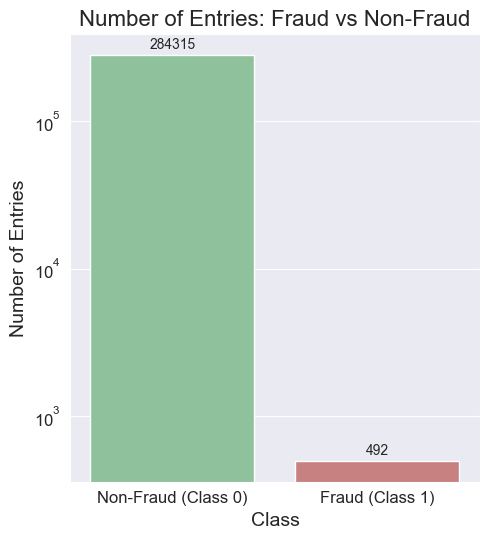

In [31]:
class_counts = df['Class'].value_counts().sort_index()
sns.set_style("darkgrid")

plt.figure(figsize=(5, 5.5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    hue=class_counts.index,  # Assign `x` to `hue` as per the warning
    dodge=False,
    palette=sns.color_palette(['#88c999', '#d47575']),  # Muted green and muted red
    legend=False
)

plt.title('Number of Entries: Fraud vs Non-Fraud', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)
plt.xticks(
    ticks=class_counts.index,
    labels=['Non-Fraud (Class 0)', 'Fraud (Class 1)'],
    fontsize=12
)
plt.yticks(fontsize=12)
plt.yscale('log')
for i, count in enumerate(class_counts.values):
    plt.text(i, count + (0.1 * count), str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


There is a clear disparity between the amount of Non-Fraud and and Fraudulent Data

**II. Transaction Amount**

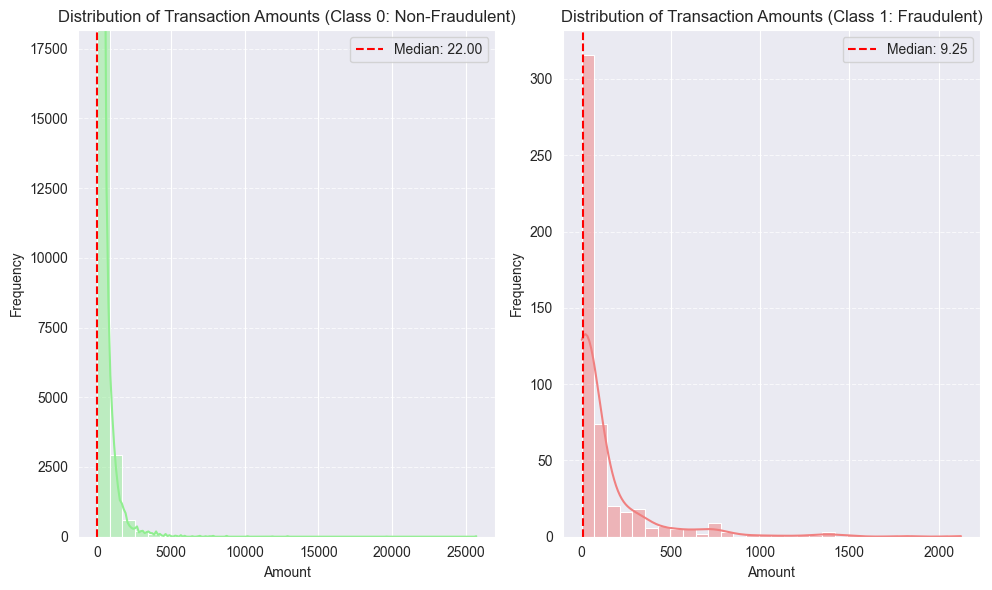

In [32]:
med0 = df[df['Class'] == 0]['Amount'].median()
med1 = df[df['Class'] == 1]['Amount'].median()

plt.figure(figsize=(10, 6))

#Non-Fraud Plot
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Transaction Amounts (Class 0: Non-Fraudulent)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 45*1*np.e**6)
plt.axvline(med0, color='red', linestyle='--', label=f'Median: {med0:.2f}') 
plt.legend()

#Fraud Plot
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=30, kde=True, color='lightcoral')

plt.title('Distribution of Transaction Amounts (Class 1: Fraudulent)')
plt.xlabel('Amount')
plt.axvline(med1, color='red', linestyle='--', label=f'Median: {med1:.2f}')  
plt.legend()
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


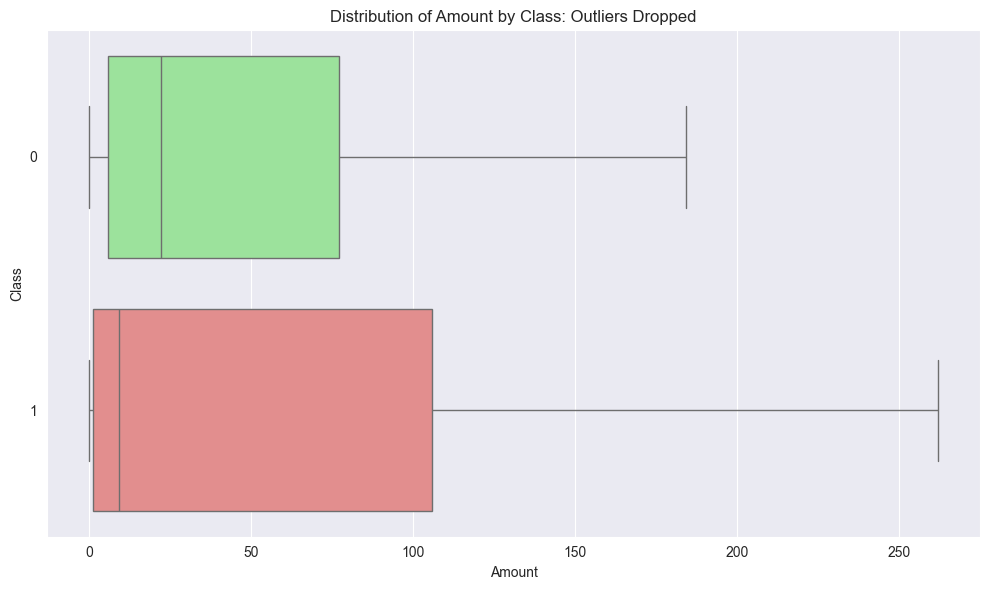

Class 0 Median: 22.0
Class 1 Median: 9.25


In [33]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Convert to numeric, if necessary
df['Class'] = df['Class'].astype('category')  # Ensure 'Class' is categorical


df.dropna(subset=['Amount', 'Class'], inplace=True)
palette = {0: 'lightgreen', 1: 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Amount", y="Class", hue="Class", palette=palette, showfliers=False)

plt.title('Distribution of Amount by Class: Outliers Dropped')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

med0 = df[df['Class'] == 0]['Amount'].median()
med1 = df[df['Class'] == 1]['Amount'].median()

print('Class 0 Median:', med0)
print('Class 1 Median:', med1)

Amount for the Transaction may be an indicator of Fraudulence or Non-Fraudulence

**III: Time of Day**

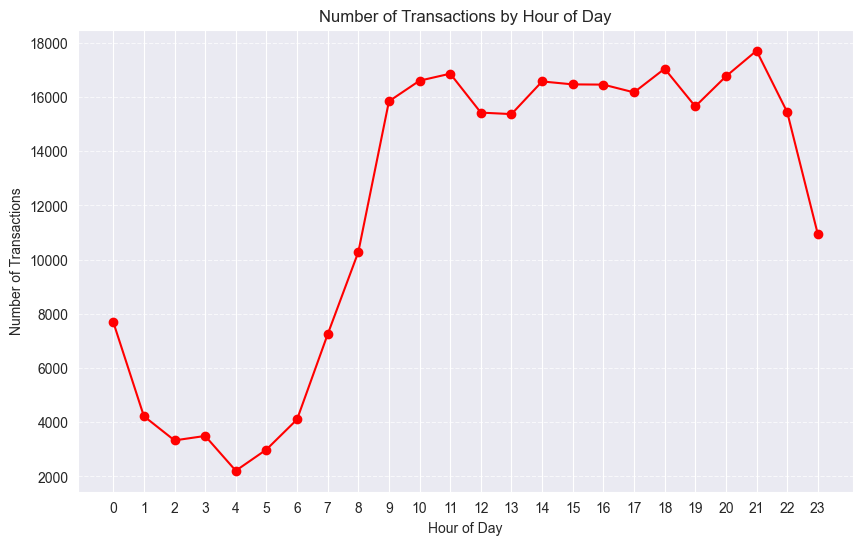

In [34]:
plt.figure(figsize=(10,6))
df['HourOfDay'].value_counts().sort_index().plot(kind='line', marker='o', color = 'red')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

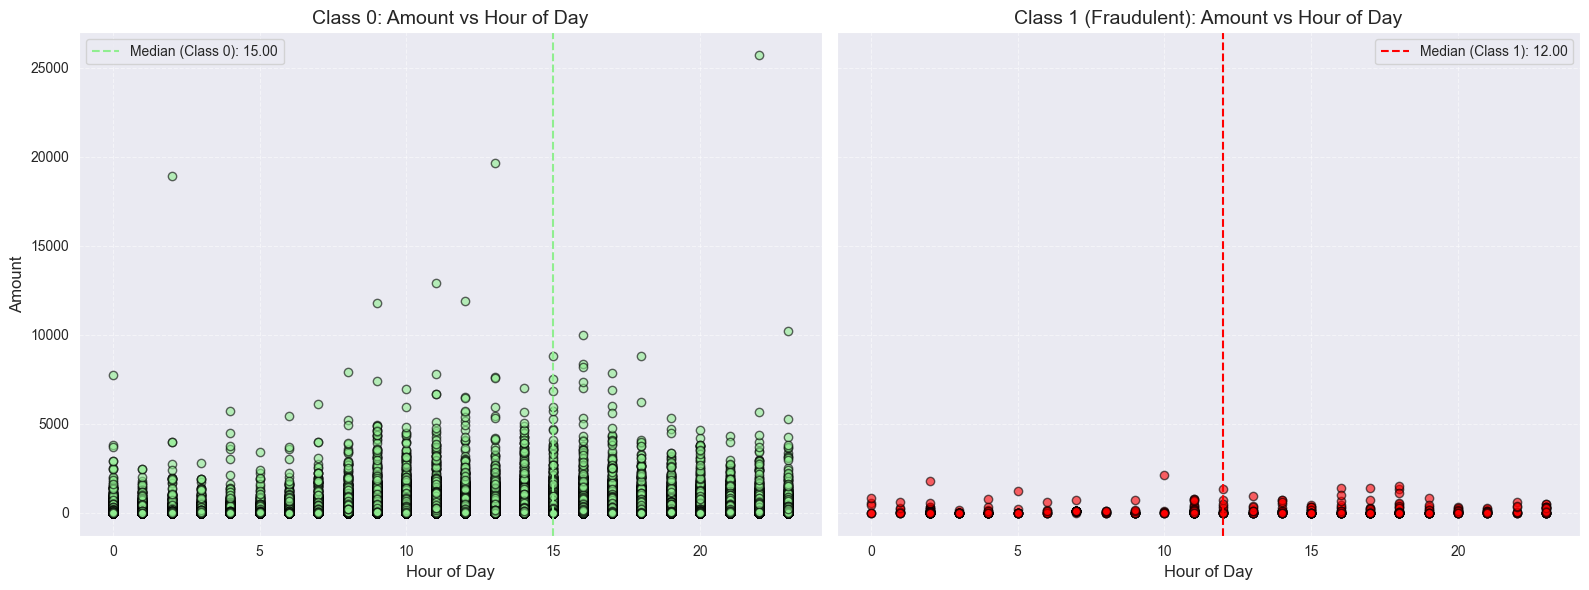

In [35]:
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]
median_class_0 = df[df['Class'] == 0]['HourOfDay'].median()
median_class_1 = df[df['Class'] == 1]['HourOfDay'].median()


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Non-Fraud Plot
axes[0].scatter(class_0['HourOfDay'], class_0['Amount'], color='lightgreen', alpha=0.6, edgecolors='k')
axes[0].axvline(median_class_0, color='lightgreen', linestyle='--', label=f'Median (Class 0): {median_class_0:.2f}')
axes[0].set_title('Class 0: Amount vs Hour of Day', fontsize=14)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Amount', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()

# Fraud Plot
axes[1].scatter(class_1['HourOfDay'], class_1['Amount'], color='red', alpha=0.6, edgecolors='k')
axes[1].axvline(median_class_1, color='red', linestyle='--', label=f'Median (Class 1): {median_class_1:.2f}')
axes[1].set_title('Class 1 (Fraudulent): Amount vs Hour of Day', fontsize=14)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Hour of the Day for the Transaction may be an indicator of Fraudulence or Non-Fraudulence